In [6]:
import pandas as pd

df = pd.read_csv("spam.csv")
print(df.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
le = LabelEncoder()

df['label_encoded'] = le.fit_transform(df['label'])

X = tfidf.fit_transform(df['text'])
y = df['label_encoded']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

C:\Users\hp\AppData\Local\Temp\ipykernel_21992\391161622.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='word', data=top_spam_words, palette='Reds_r')


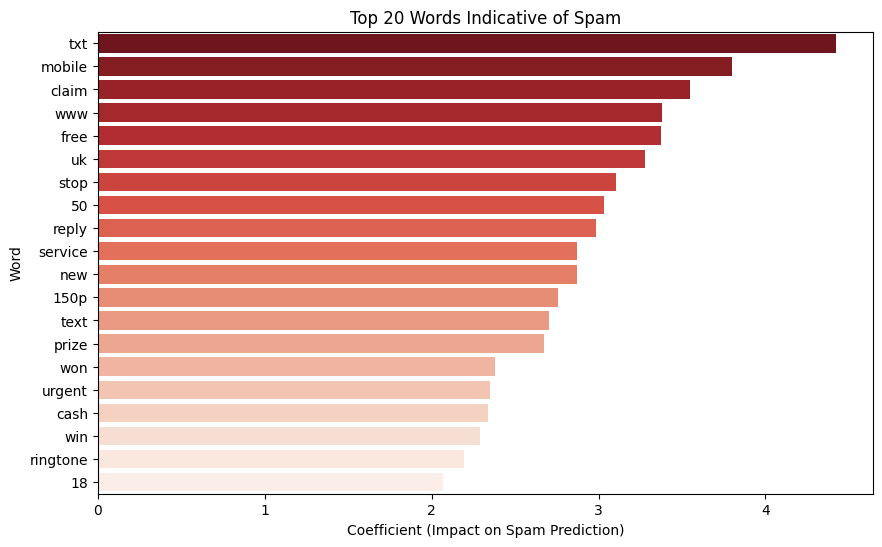

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]
coef_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients
})


top_spam_words = coef_df.sort_values(by='coefficient', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='coefficient', y='word', data=top_spam_words, palette='Reds_r')
plt.title("Top 20 Words Indicative of Spam")
plt.xlabel("Coefficient (Impact on Spam Prediction)")
plt.ylabel("Word")
plt.show()

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9533632286995516


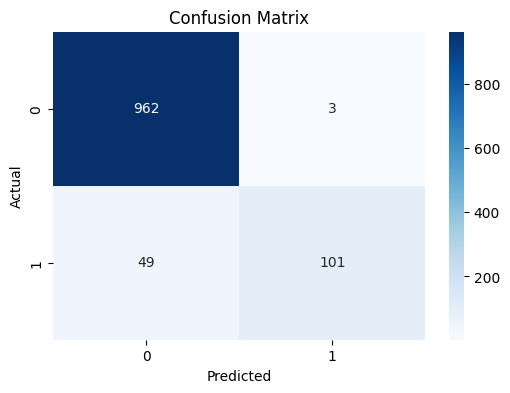

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.979372197309417


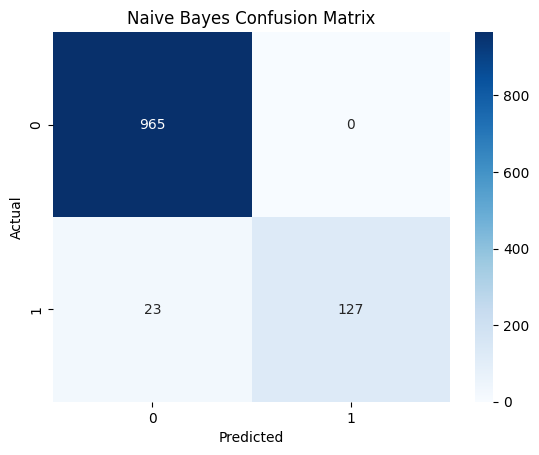

In [ ]:
# using MN NaiveBayes
from sklearn.naive_bayes import MultinomialNB


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()
